In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("road_accidents.csv")

In [3]:
data.head()

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STATE/UT   490 non-null    object
 1   YEAR       490 non-null    int64 
 2   JANUARY    490 non-null    int64 
 3   FEBRUARY   490 non-null    int64 
 4   MARCH      490 non-null    int64 
 5   APRIL      490 non-null    int64 
 6   MAY        490 non-null    int64 
 7   JUNE       490 non-null    int64 
 8   JULY       490 non-null    int64 
 9   AUGUST     490 non-null    int64 
 10  SEPTEMBER  490 non-null    int64 
 11  OCTOBER    490 non-null    int64 
 12  NOVEMBER   490 non-null    int64 
 13  DECEMBER   490 non-null    int64 
 14  TOTAL      490 non-null    int64 
dtypes: int64(14), object(1)
memory usage: 57.6+ KB


In [5]:
data['MONTHLY_TOTAL'] = data.iloc[:, 2:14].sum(axis=1)
yearly_totals = data.groupby('YEAR')['MONTHLY_TOTAL'].sum()

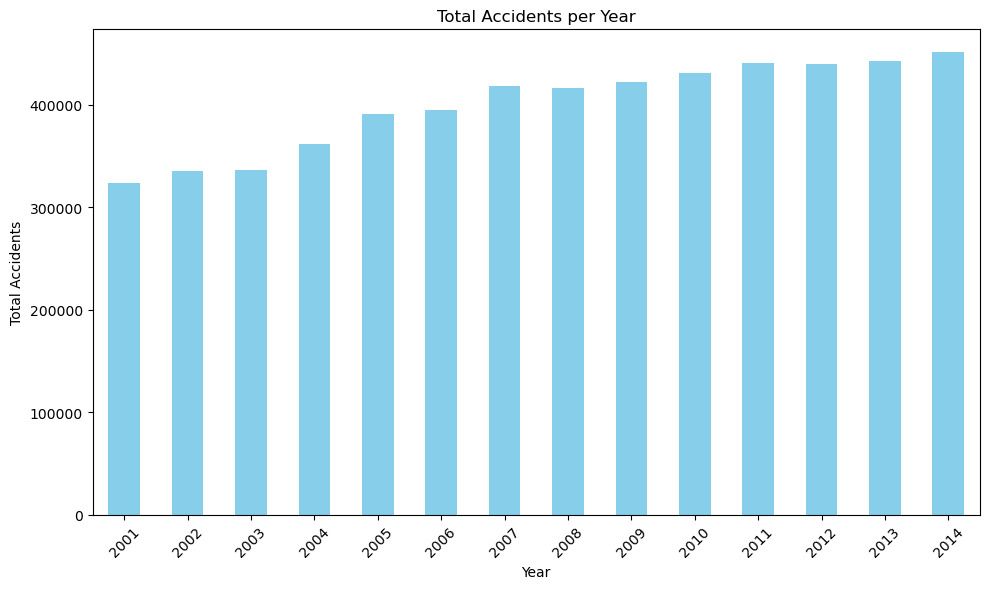

In [6]:
plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='bar', color='skyblue')
plt.title('Total Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



A & N Islands: Total Accidents - 2893


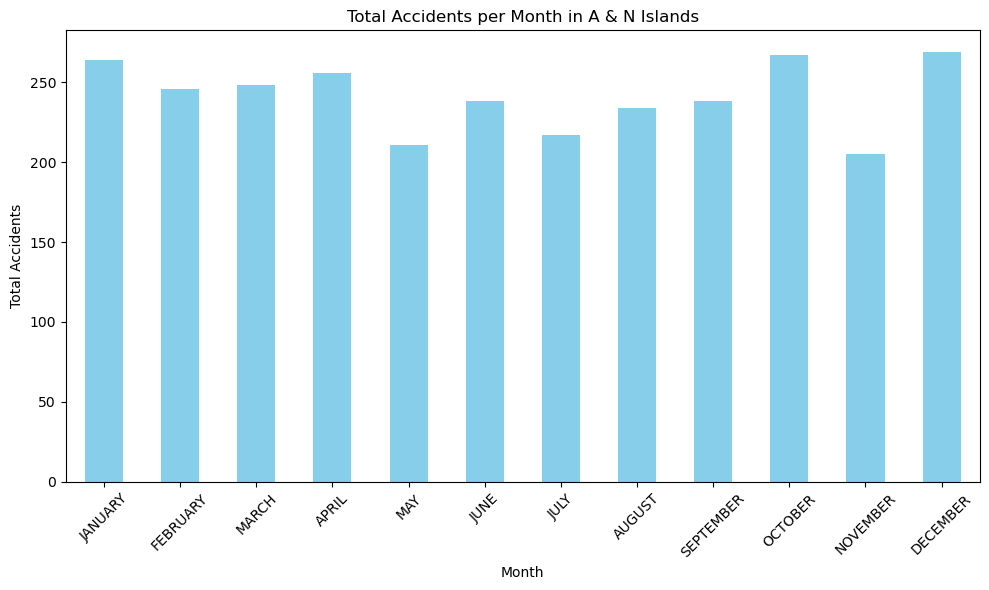


Andhra Pradesh: Total Accidents - 546821


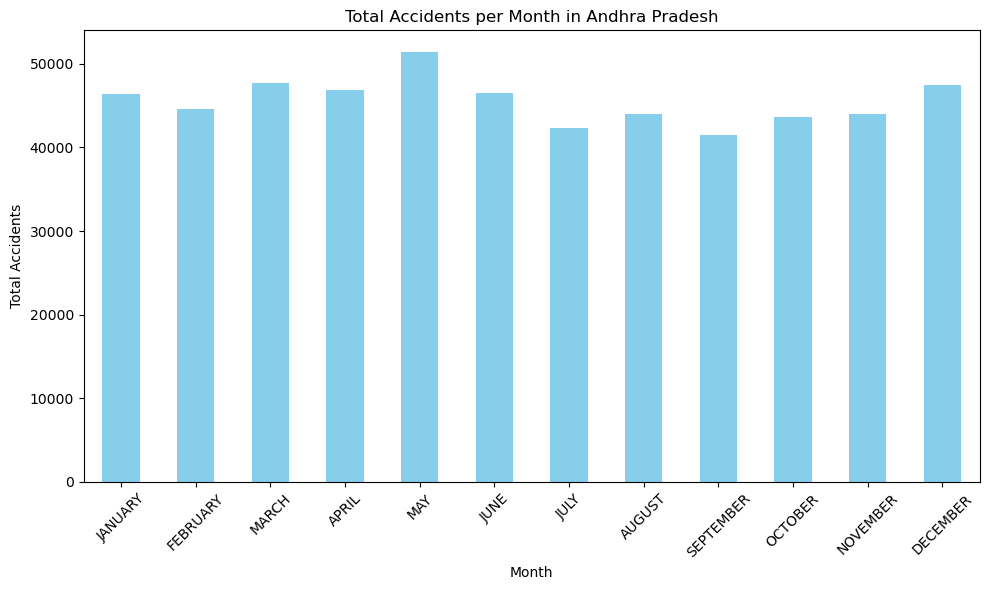


Arunachal Pradesh: Total Accidents - 3389


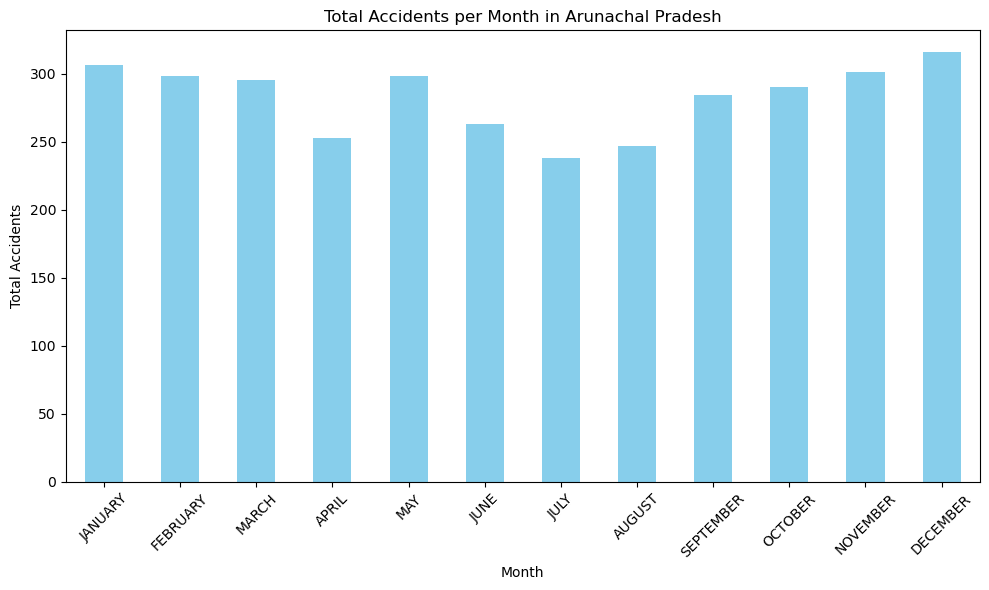


Assam: Total Accidents - 61718


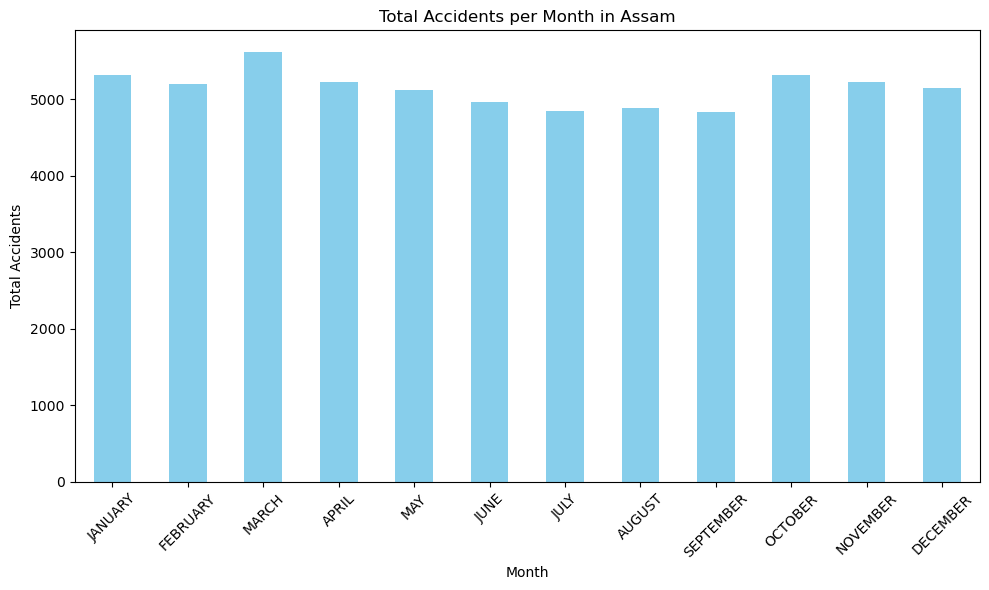


Bihar: Total Accidents - 92648


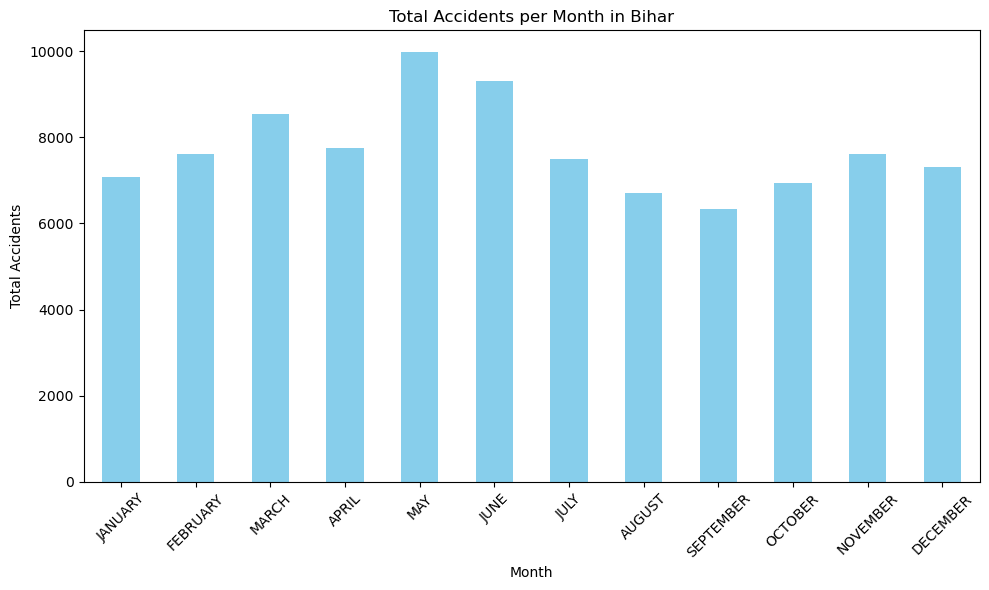


Chandigarh: Total Accidents - 6411


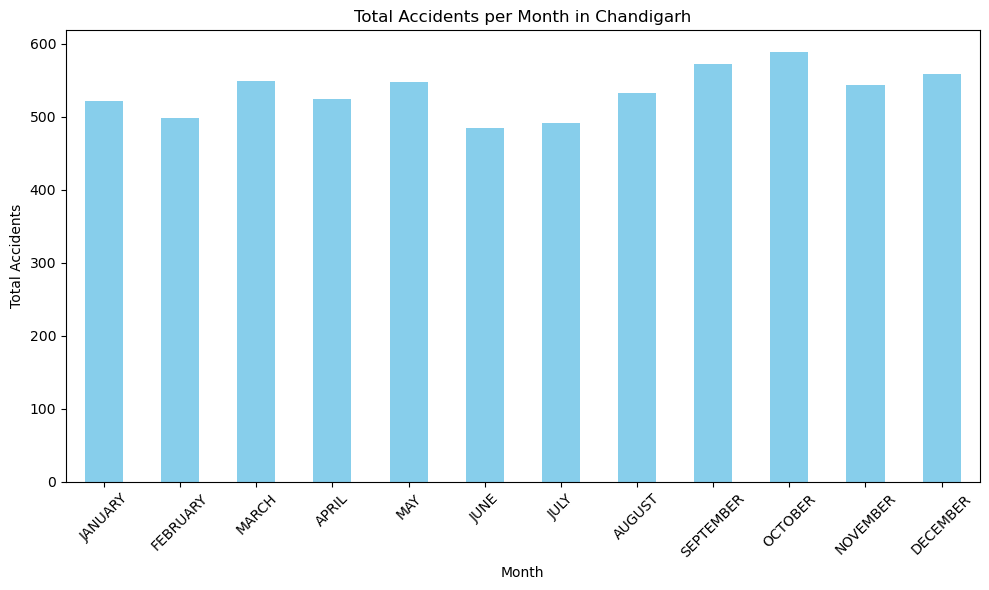


Chhattisgarh: Total Accidents - 117817


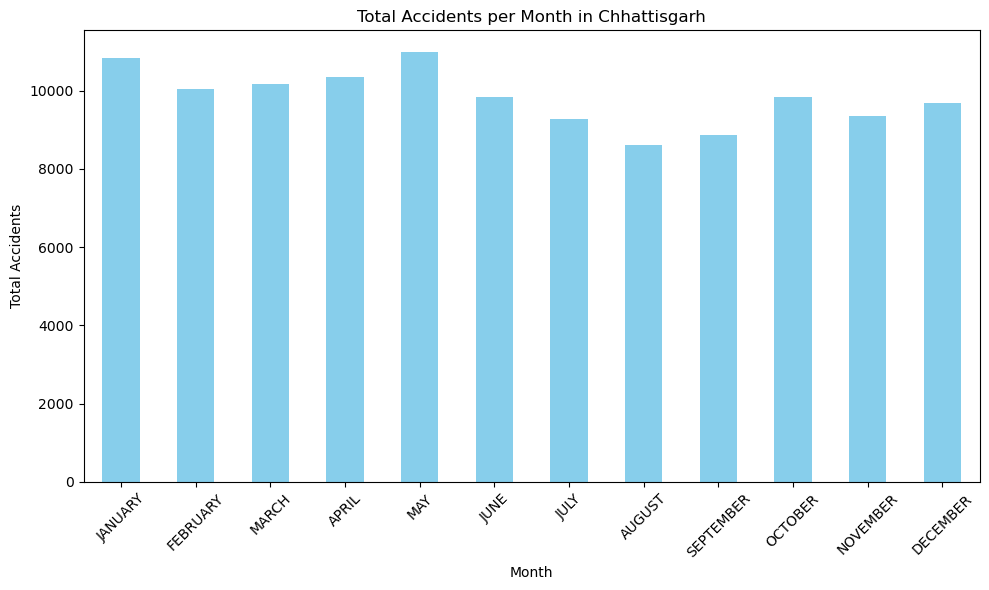


D & N Haveli: Total Accidents - 1216


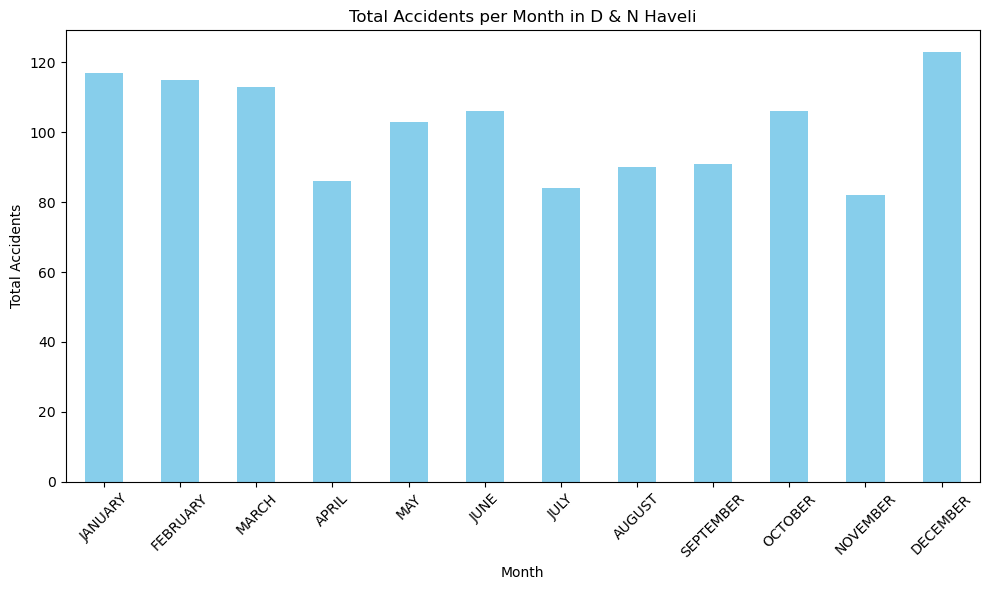


D&N Haveli: Total Accidents - 87


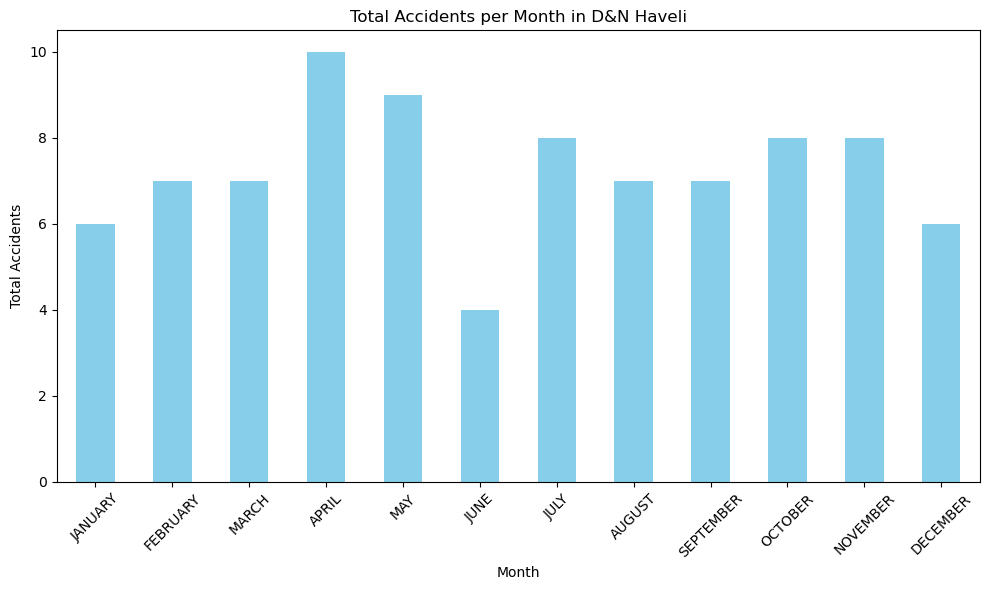


Daman & Diu: Total Accidents - 643


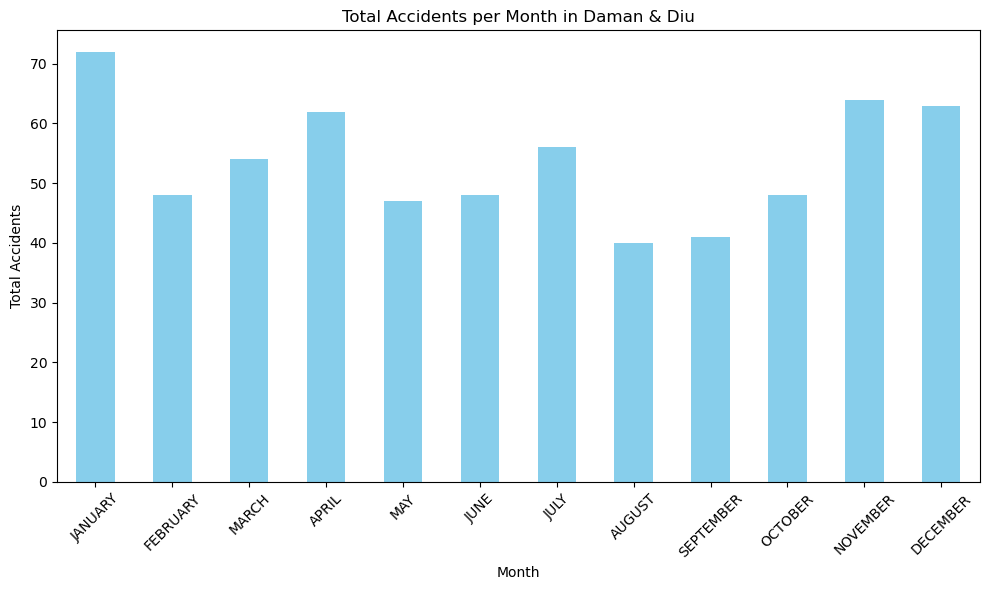


Delhi (Ut): Total Accidents - 110964


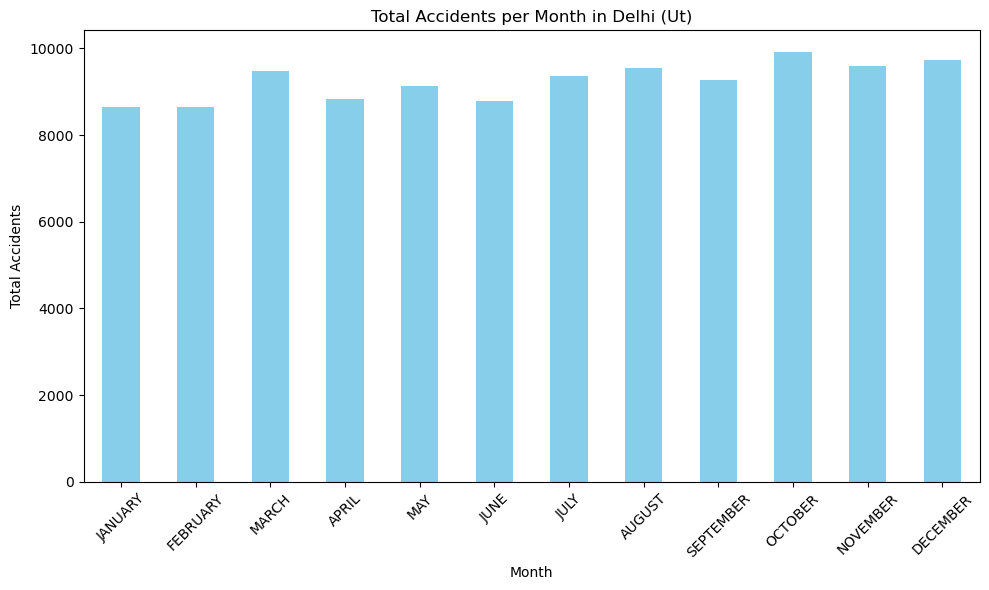


Delhi Ut: Total Accidents - 8310


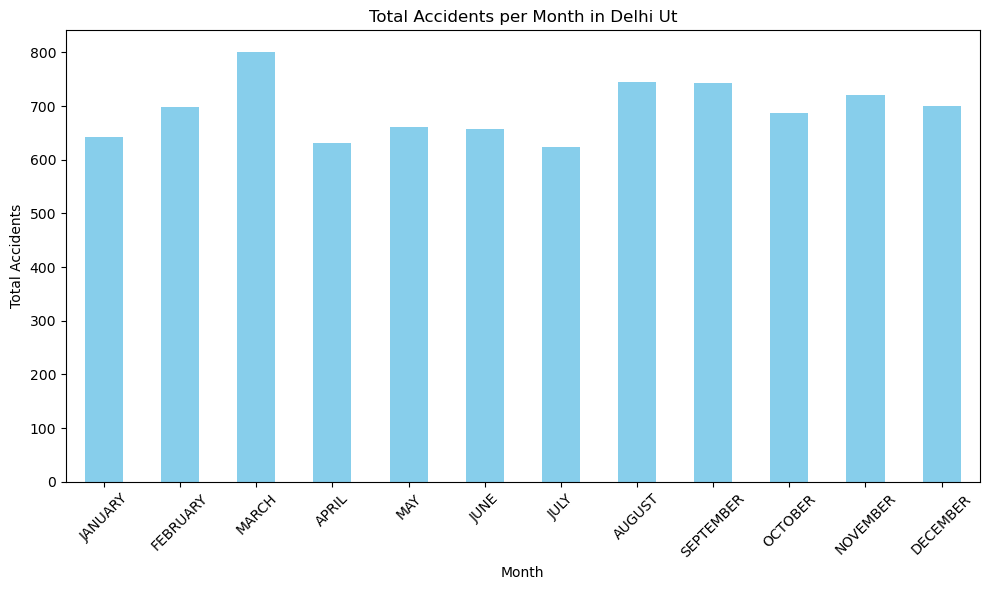


Goa: Total Accidents - 44931


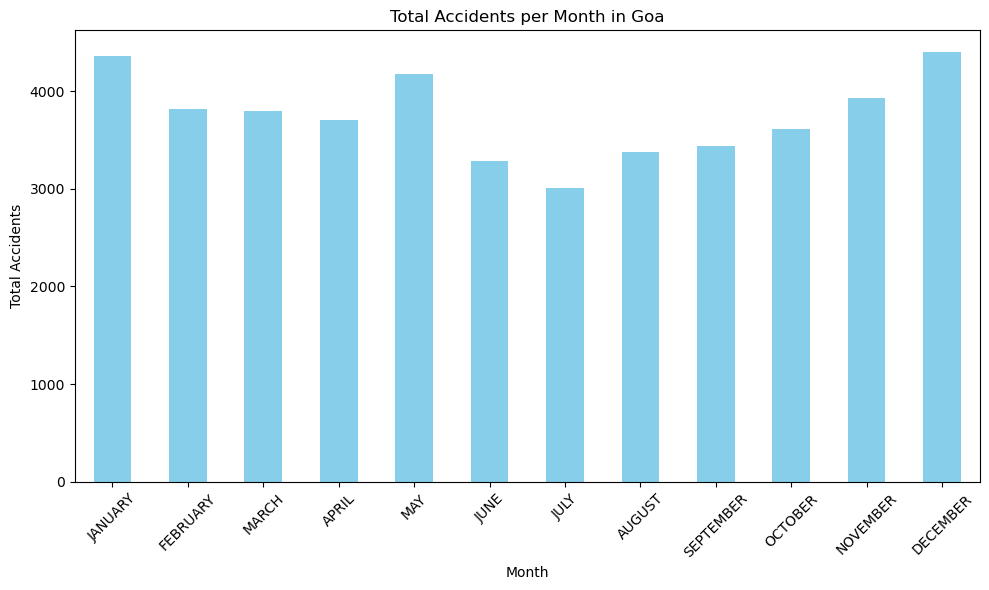


Gujarat: Total Accidents - 300325


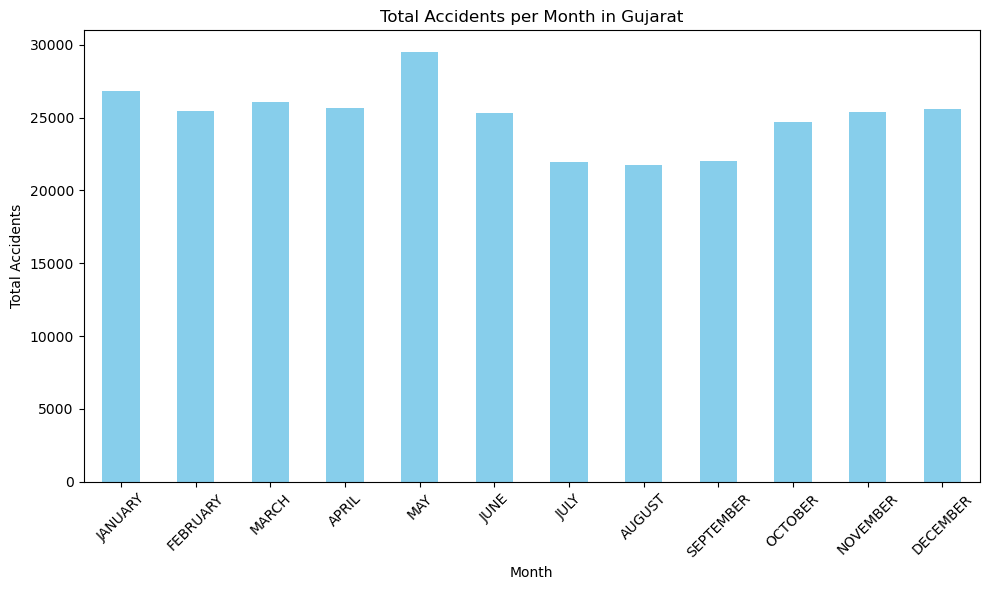


Haryana: Total Accidents - 131921


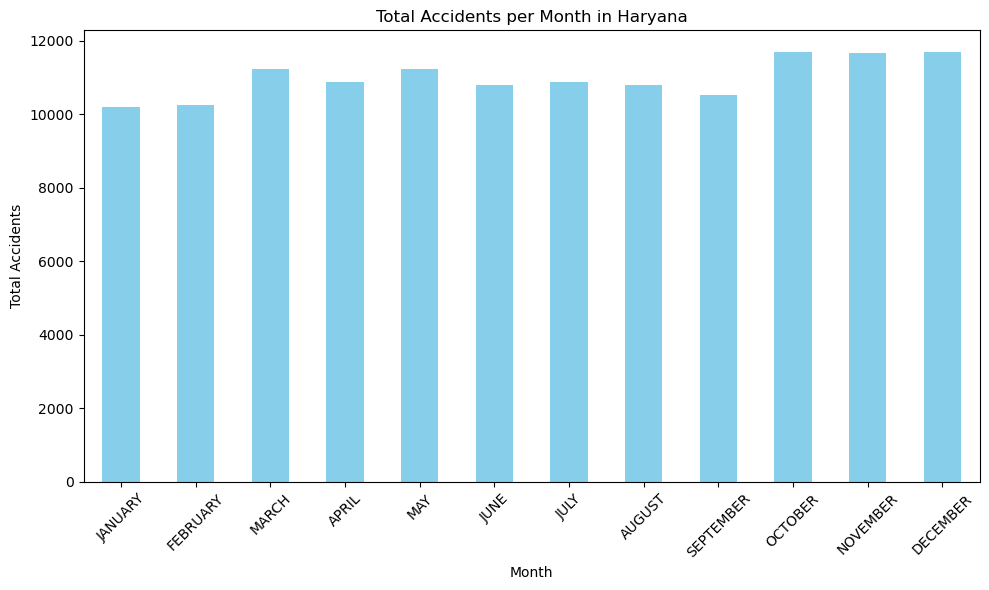


Himachal Pradesh: Total Accidents - 37105


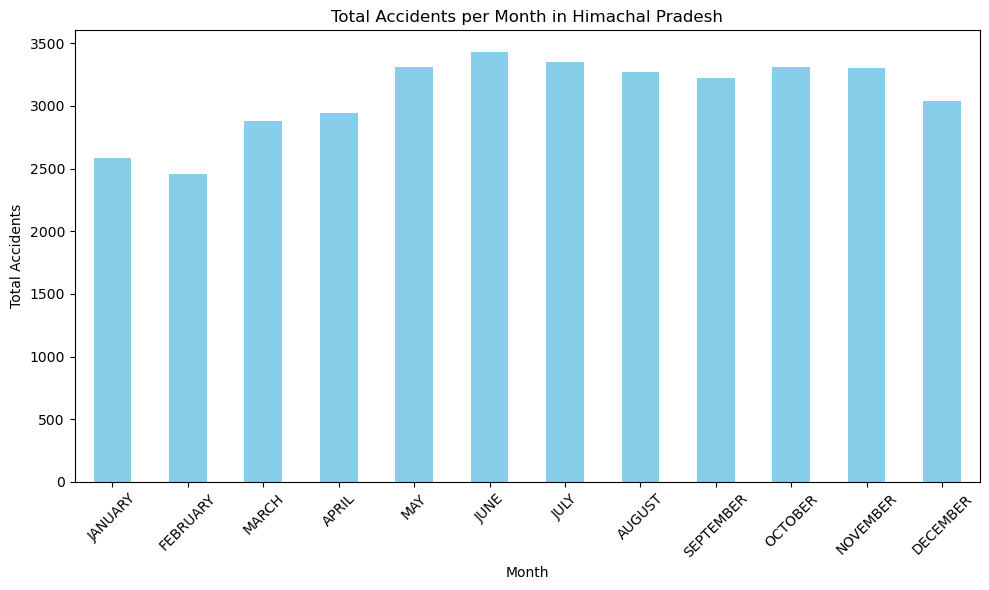


Jammu & Kashmir: Total Accidents - 82820


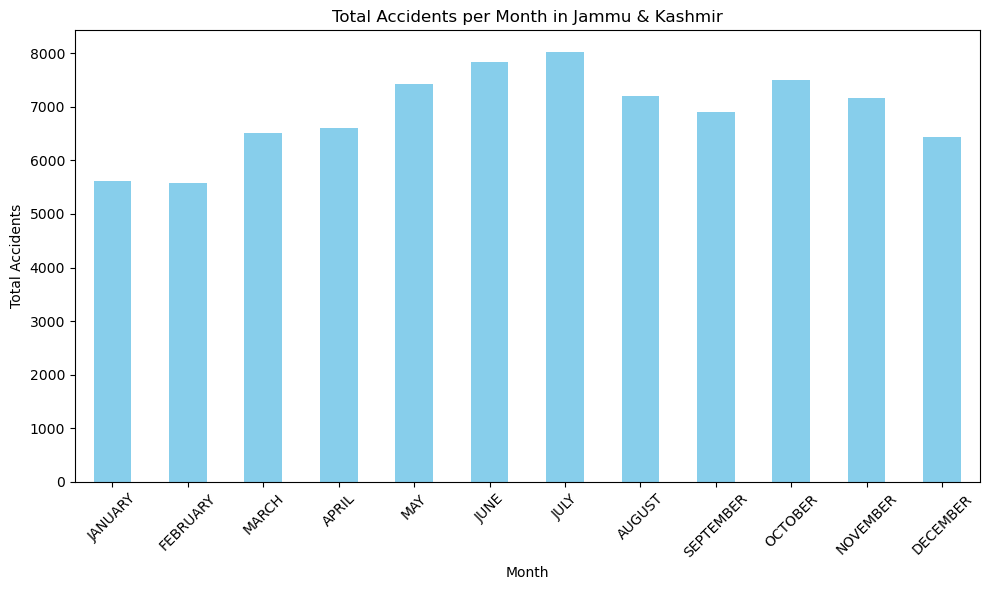


Jharkhand: Total Accidents - 46209


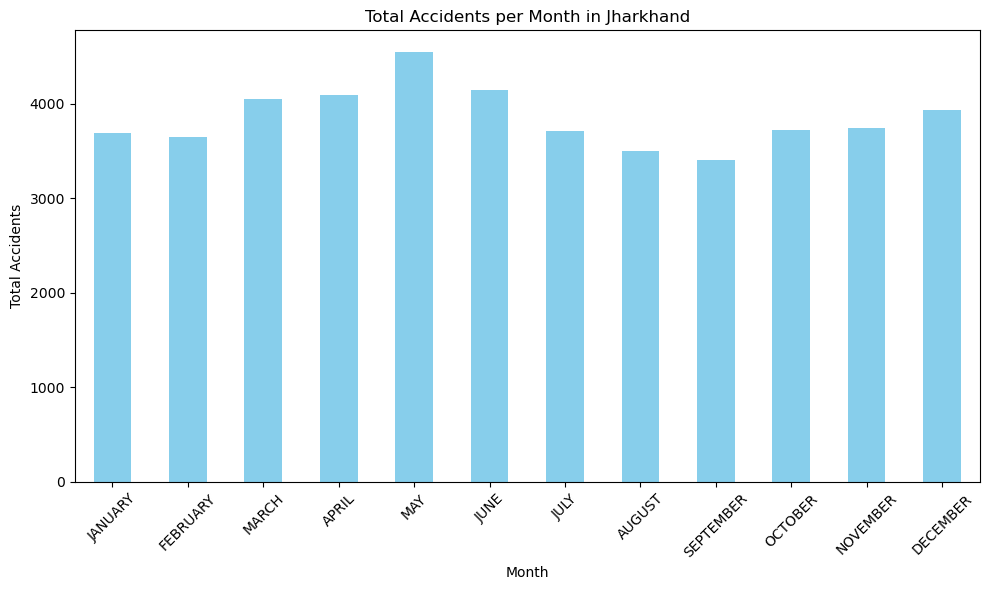


Karnataka: Total Accidents - 584761


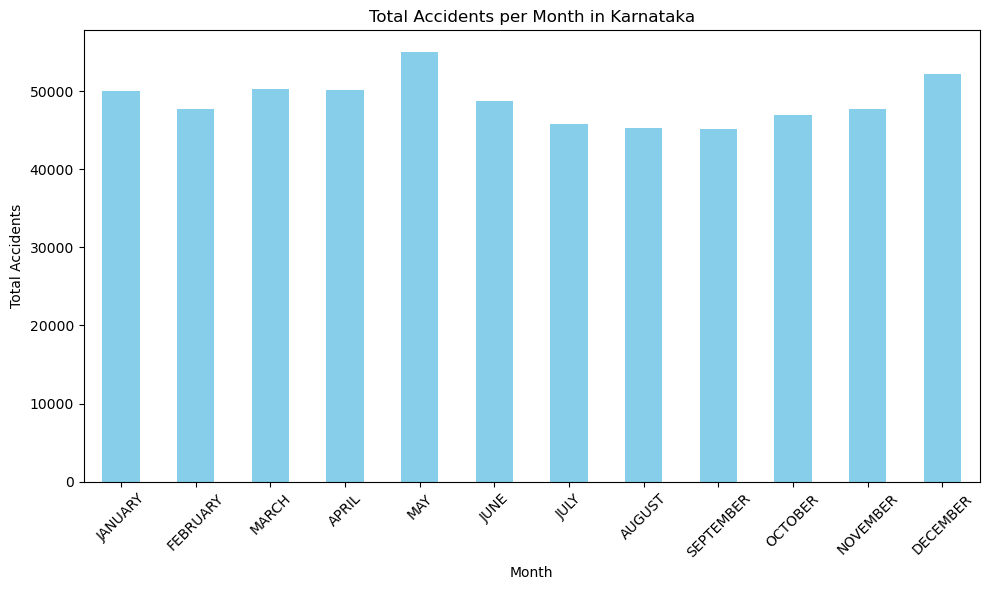


Kerala: Total Accidents - 518161


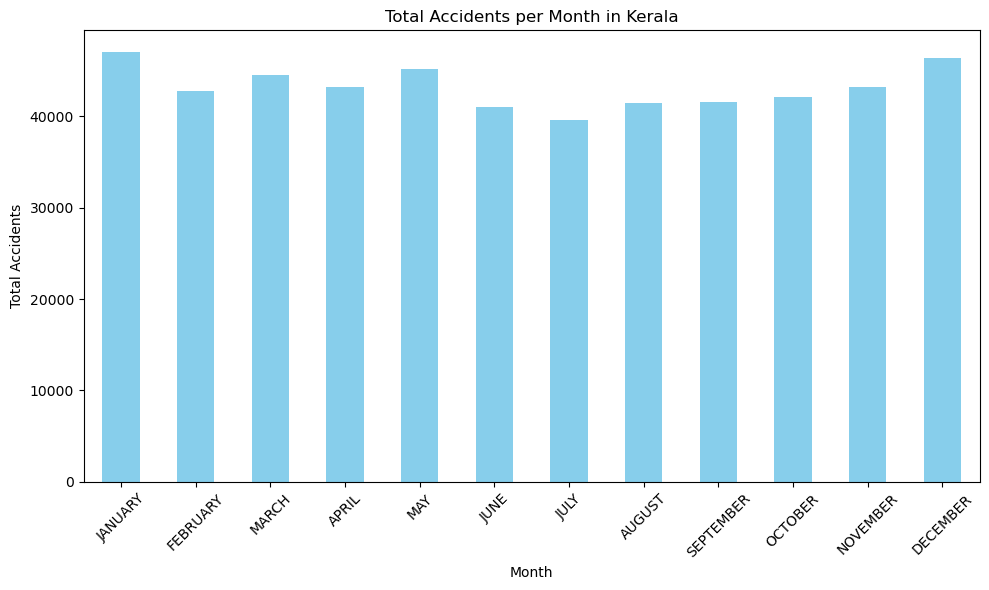


Lakshadweep: Total Accidents - 14


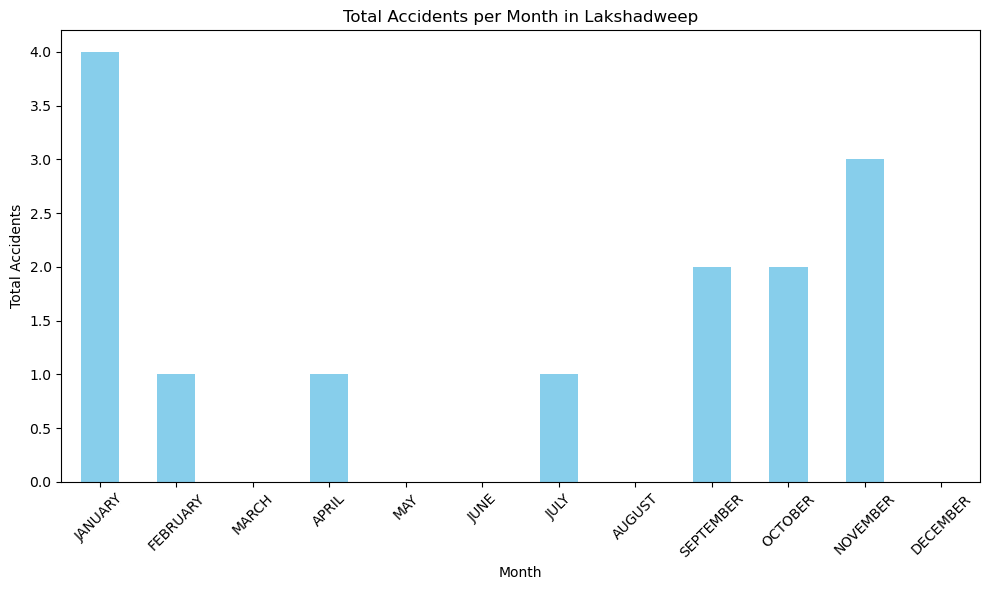


Madhya Pradesh: Total Accidents - 394007


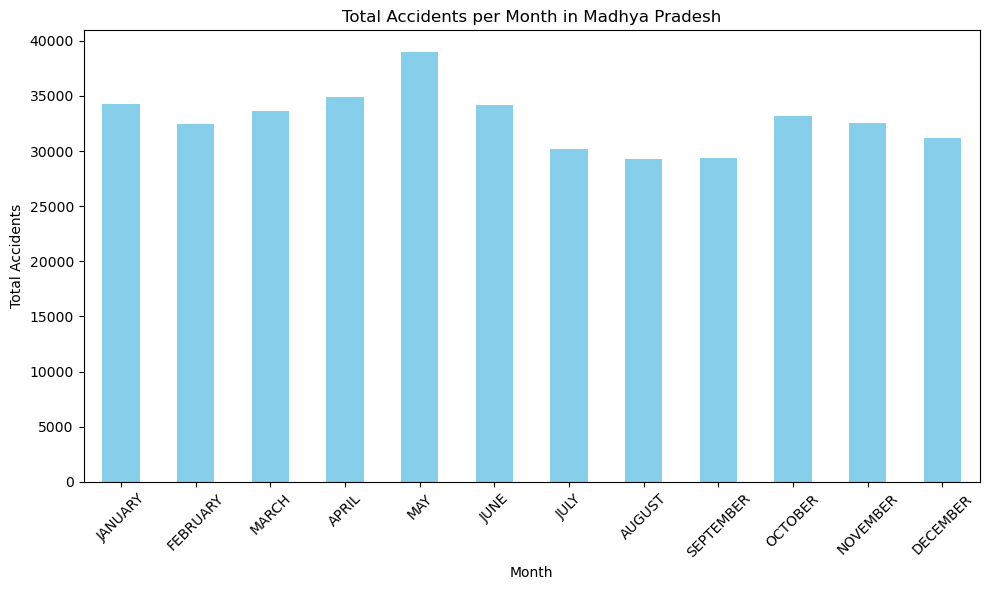


Maharashtra: Total Accidents - 641614


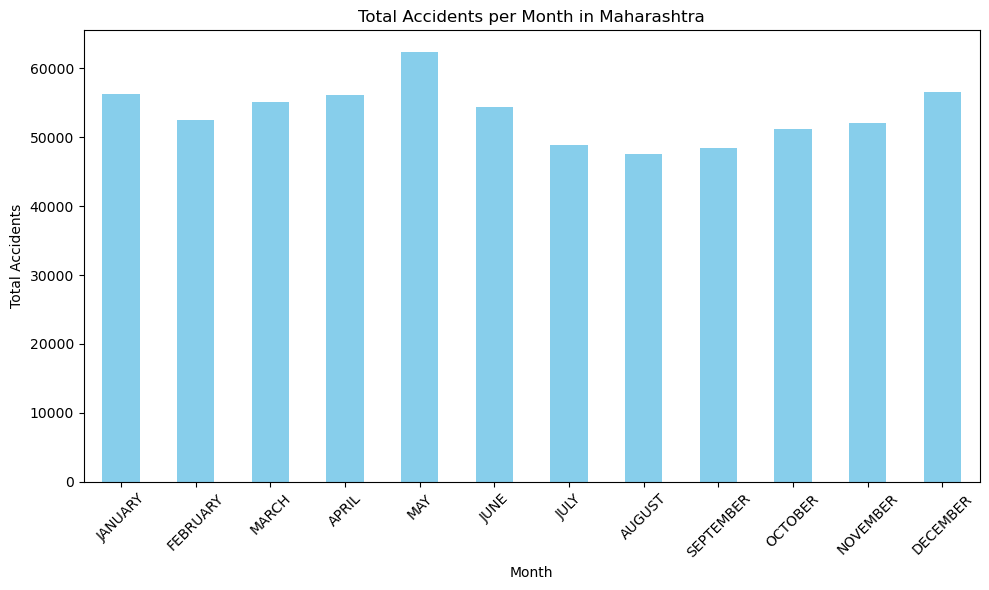


Manipur: Total Accidents - 8130


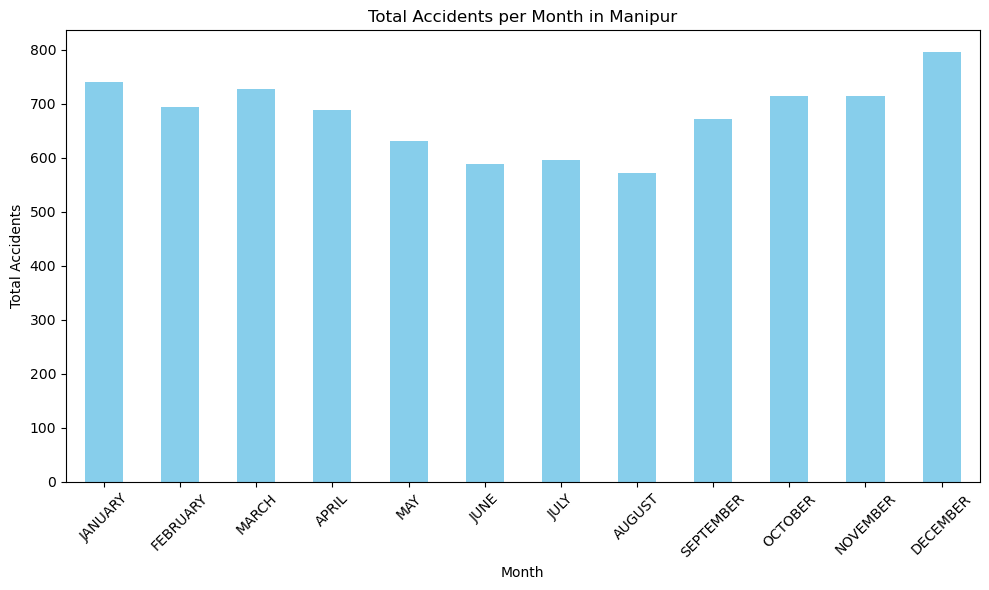


Meghalaya: Total Accidents - 3863


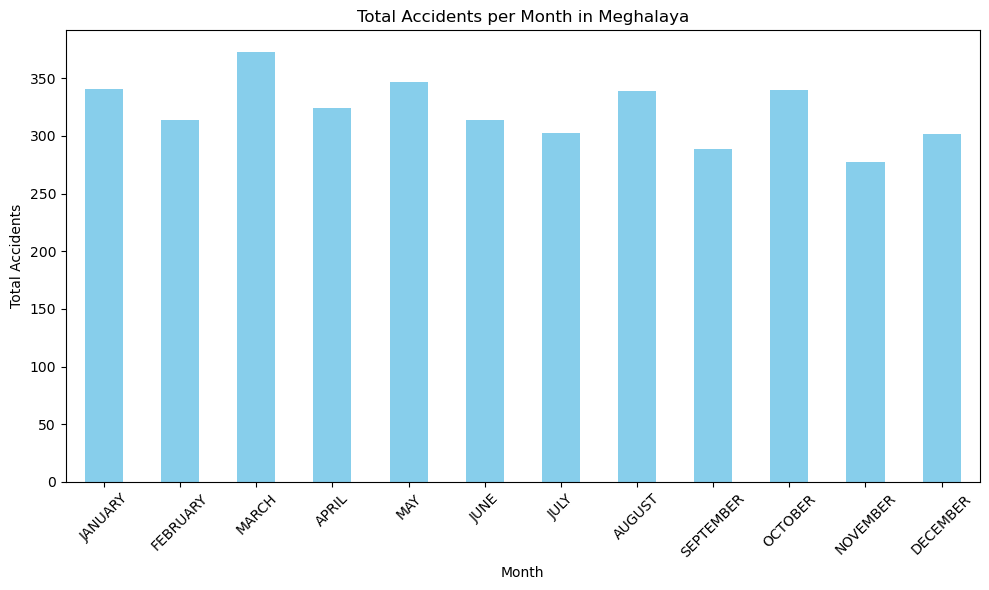


Mizoram: Total Accidents - 1116


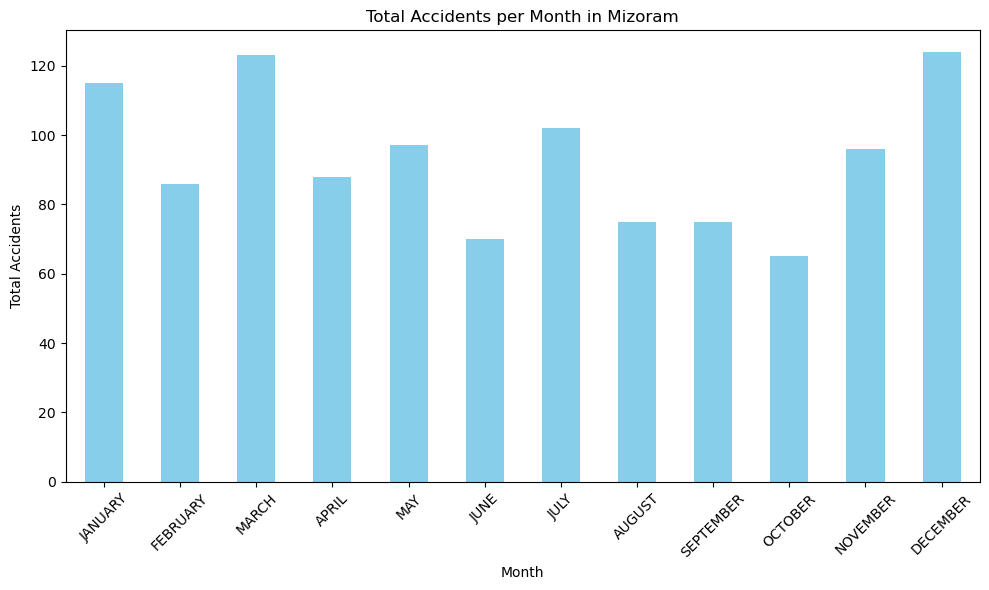


Nagaland: Total Accidents - 781


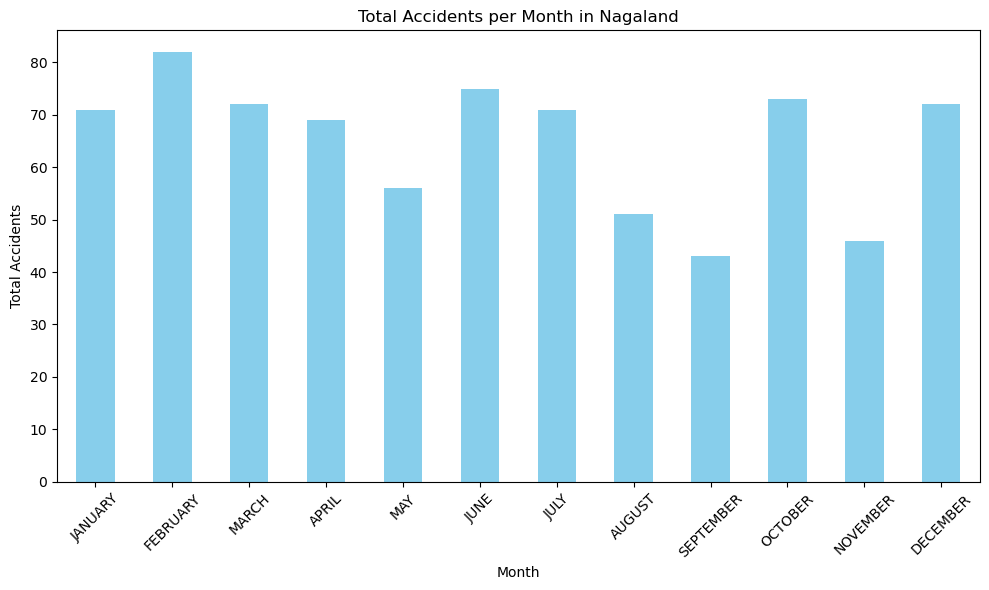


Odisha: Total Accidents - 115237


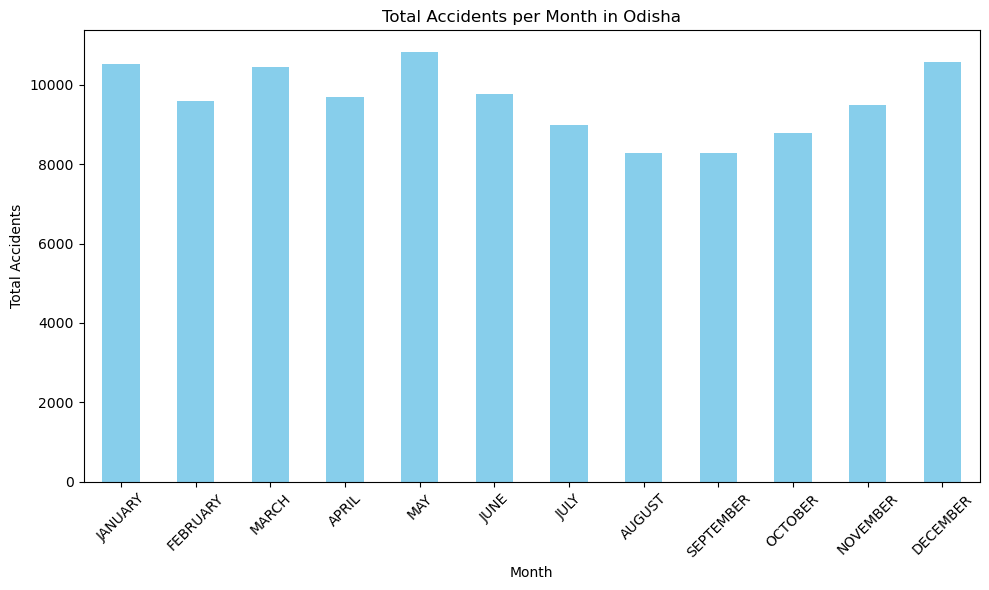


Puducherry: Total Accidents - 21189


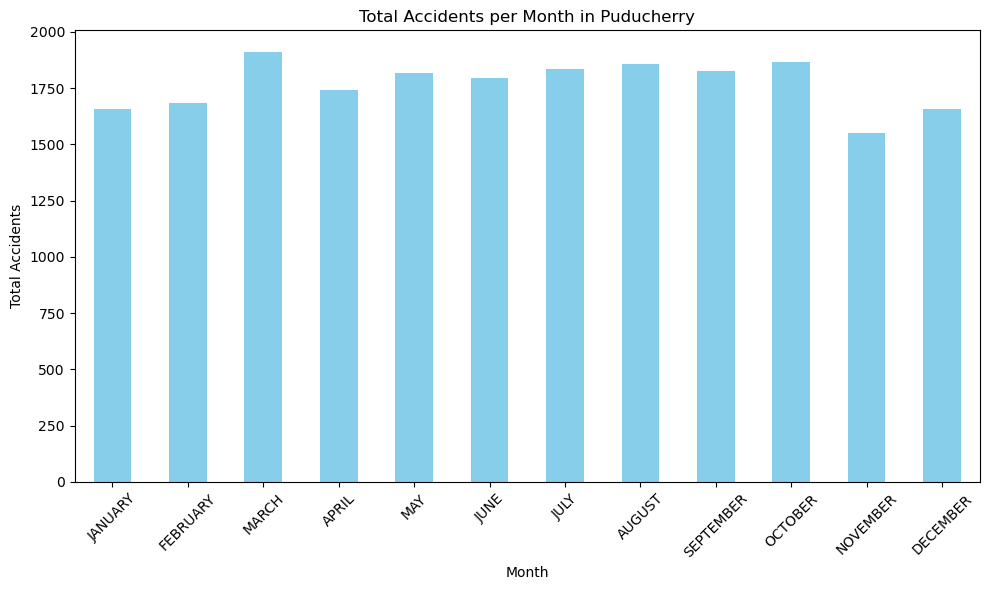


Punjab: Total Accidents - 46804


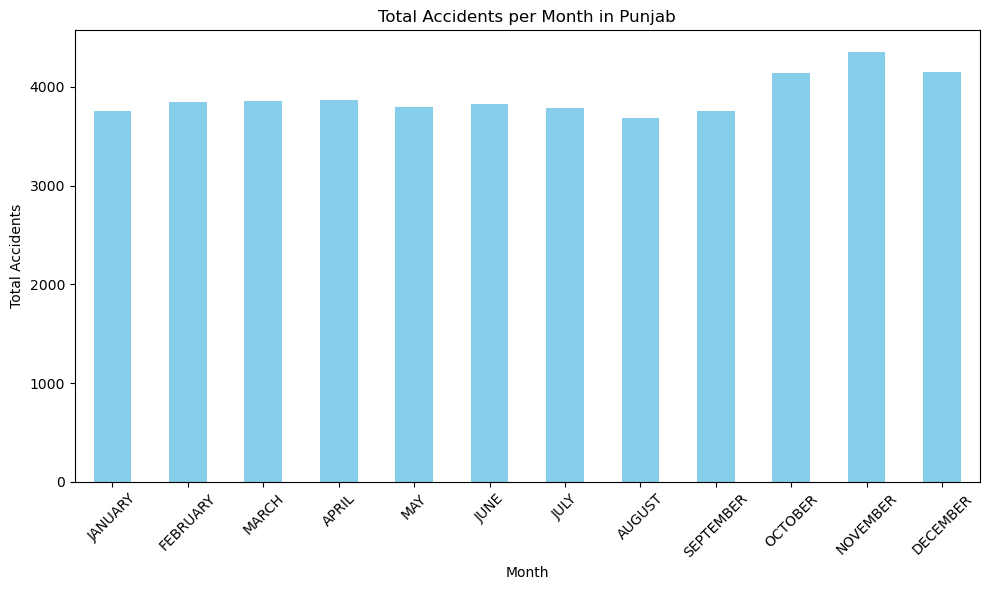


Rajasthan: Total Accidents - 323653


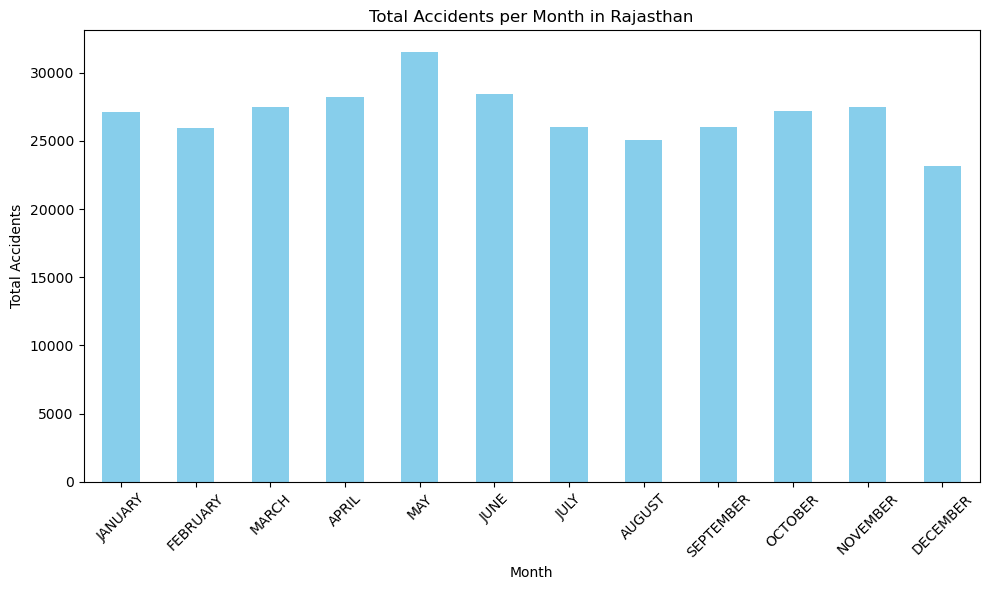


Sikkim: Total Accidents - 2646


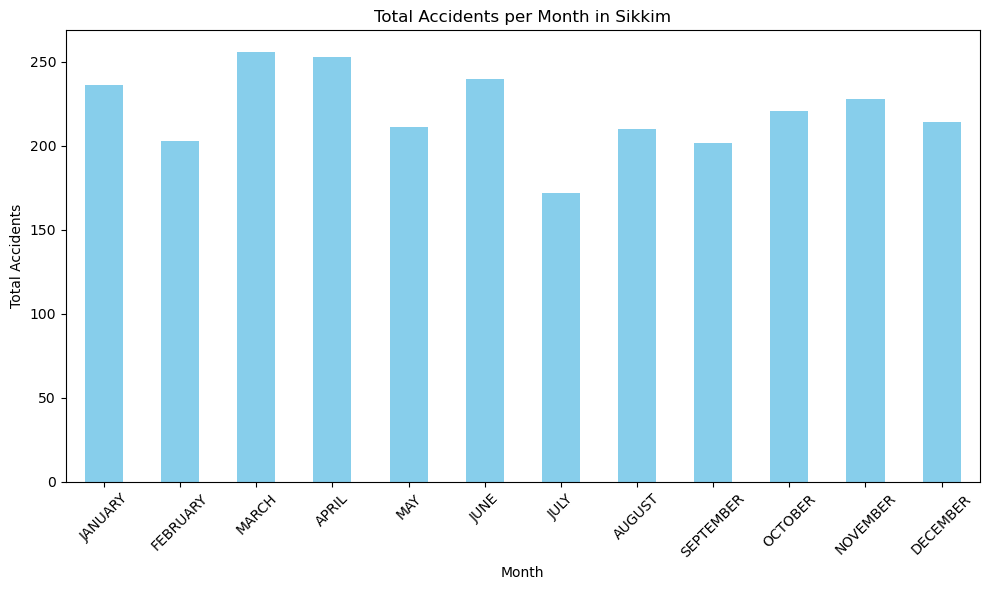


Tamil Nadu: Total Accidents - 852073


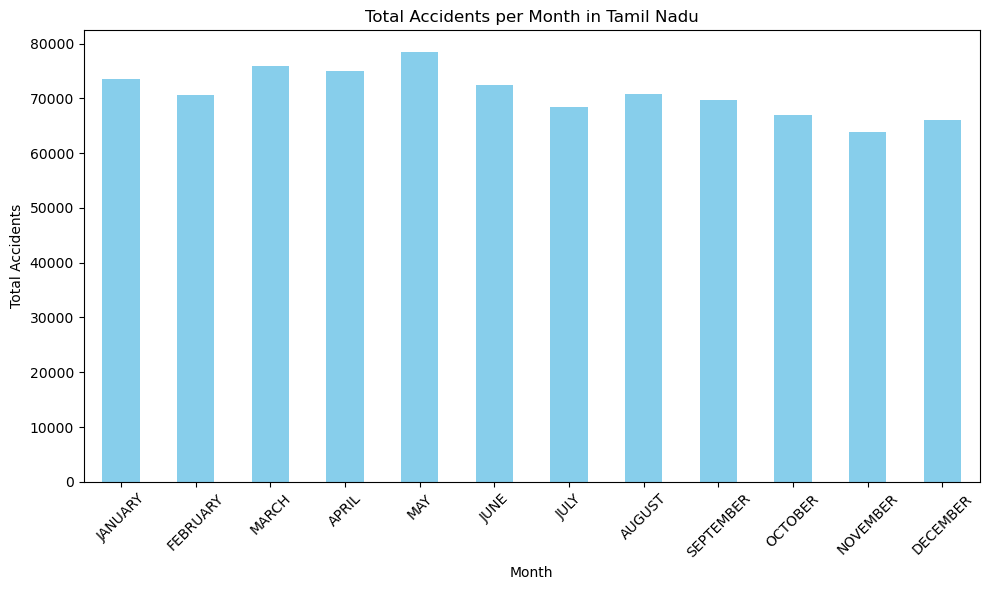


Tripura: Total Accidents - 10534


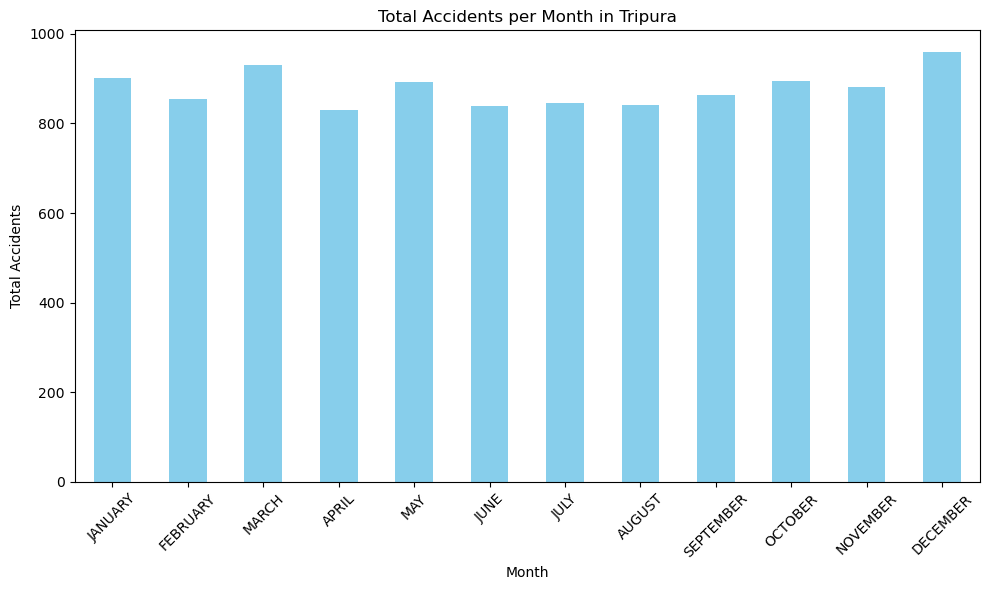


Uttar Pradesh: Total Accidents - 274528


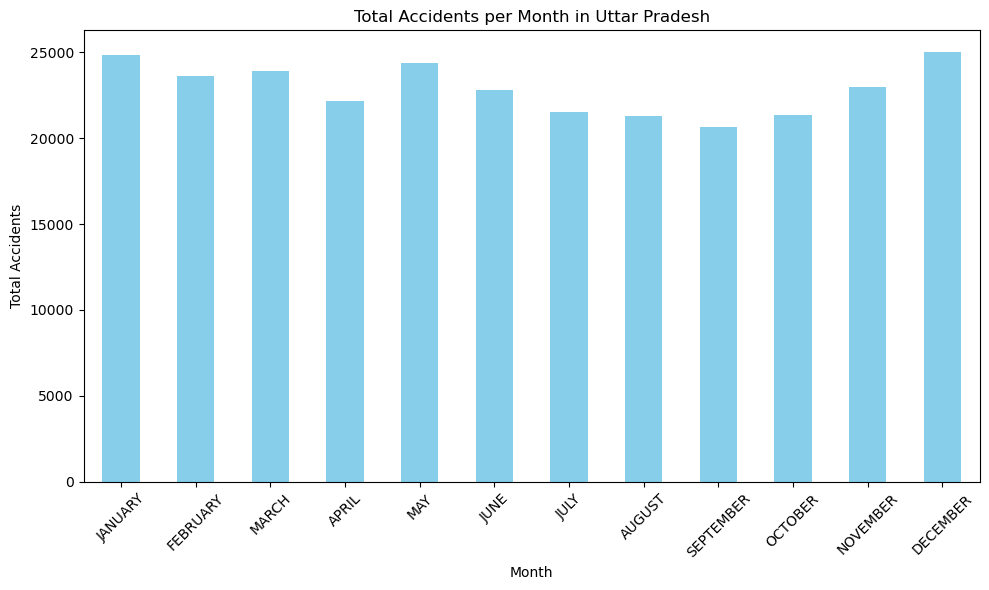


Uttarakhand: Total Accidents - 18192


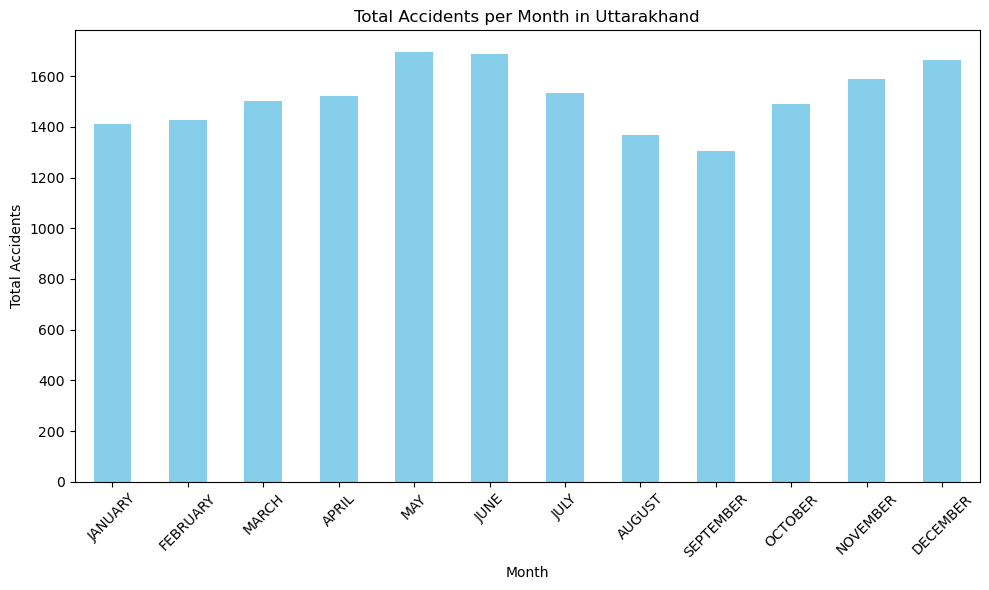


West Bengal: Total Accidents - 189375


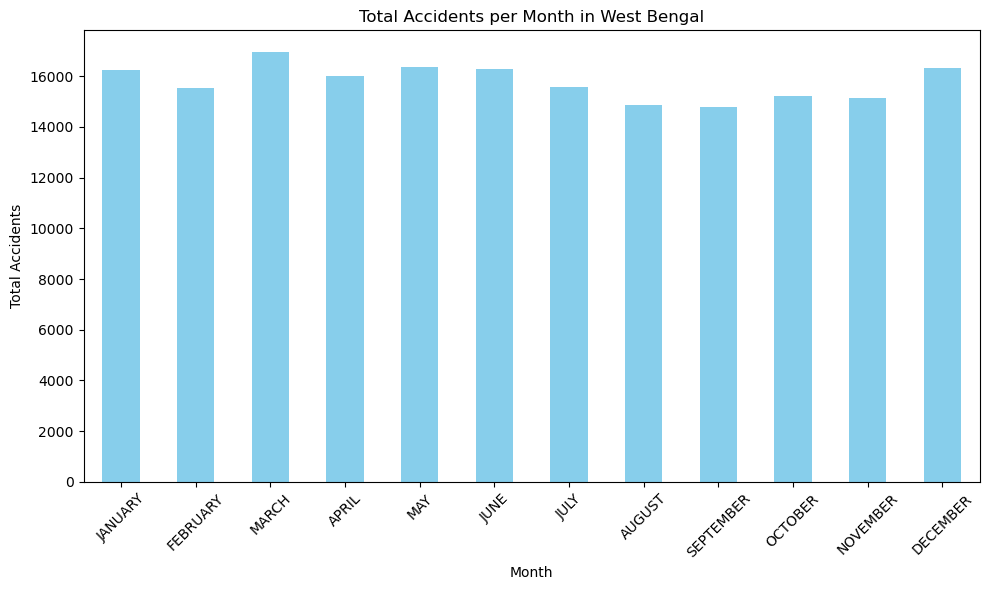

In [7]:
for state, state_data in data.groupby('STATE/UT'):
    # Identify hotspots
    state_total = state_data['MONTHLY_TOTAL'].sum()
    print(f"\n{state}: Total Accidents - {state_total}")

    # Plot monthly totals
    monthly_totals = state_data.iloc[:, 2:14].sum()
    plt.figure(figsize=(10, 6))
    monthly_totals.plot(kind='bar', color='skyblue')
    plt.title(f'Total Accidents per Month in {state}')
    plt.xlabel('Month')
    plt.ylabel('Total Accidents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [8]:
 weather_data = {
     'STATE/UT': [state],
     'WEATHER': ['Sunny']  # Replace with actual weather data for each state
    }
weather_df = pd.DataFrame(weather_data)

In [9]:
 merged_data = pd.merge(state_data, weather_df, on='STATE/UT')

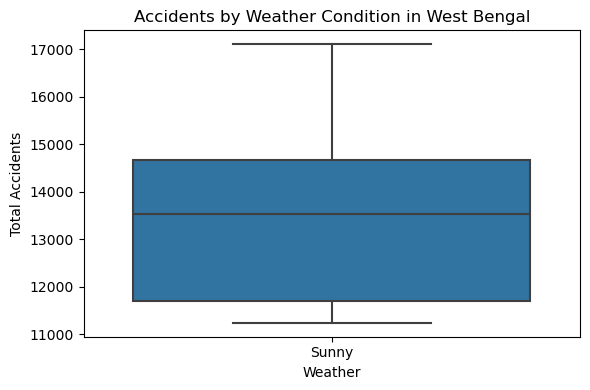

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='WEATHER', y='MONTHLY_TOTAL', data=merged_data)
plt.title(f'Accidents by Weather Condition in {state}')
plt.xlabel('Weather')
plt.ylabel('Total Accidents')
plt.tight_layout()
plt.show()